In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [20]:
df = pd.read_excel("교통사고.xlsx")
df

,Unnamed: 0,자치구,날짜,하수관로 비율,사고[건]
0,NaN,종로,20180601,0.009084,4
1,NaN,종로,20180602,0.008864,4
2,NaN,종로,20180603,0.008182,3
3,NaN,종로,20180604,0.008745,2
4,NaN,종로,20180605,0.008753,8
...,...,...,...,...,...
11495,NaN,강동,20220827,0.069436,6
11496,NaN,강동,20220828,0.06221,4
11497,NaN,강동,20220829,0.066022,2
11498,NaN,강동,20220830,0.090625,5


In [25]:
df.info()

df['하수관로 비율'] = pd.to_numeric(df['하수관로 비율'], errors='coerce')
print(df.dtypes)
df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   자치구         11500 non-null  object 
 2   날짜          11500 non-null  int64  
 3   하수관로 비율     11287 non-null  float64
 4   사고[건]       11500 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 449.3+ KB
Unnamed: 0    float64
자치구            object
날짜              int64
하수관로 비율       float64
사고[건]           int64
dtype: object


,Unnamed: 0,자치구,날짜,하수관로 비율,사고[건]
0,0.0,종로,20180601,0.009084,4
1,0.0,종로,20180602,0.008864,4
2,0.0,종로,20180603,0.008182,3
3,0.0,종로,20180604,0.008745,2
4,0.0,종로,20180605,0.008753,8
...,...,...,...,...,...
11495,0.0,강동,20220827,0.069436,6
11496,0.0,강동,20220828,0.062210,4
11497,0.0,강동,20220829,0.066022,2
11498,0.0,강동,20220830,0.090625,5


In [39]:
df1 = df.drop(['Unnamed: 0','날짜'], axis=1)

corr = df1.corr(method = 'pearson')
corr

,하수관로 비율,사고[건]
하수관로 비율,1.000000,0.117504
사고[건],0.117504,1.000000


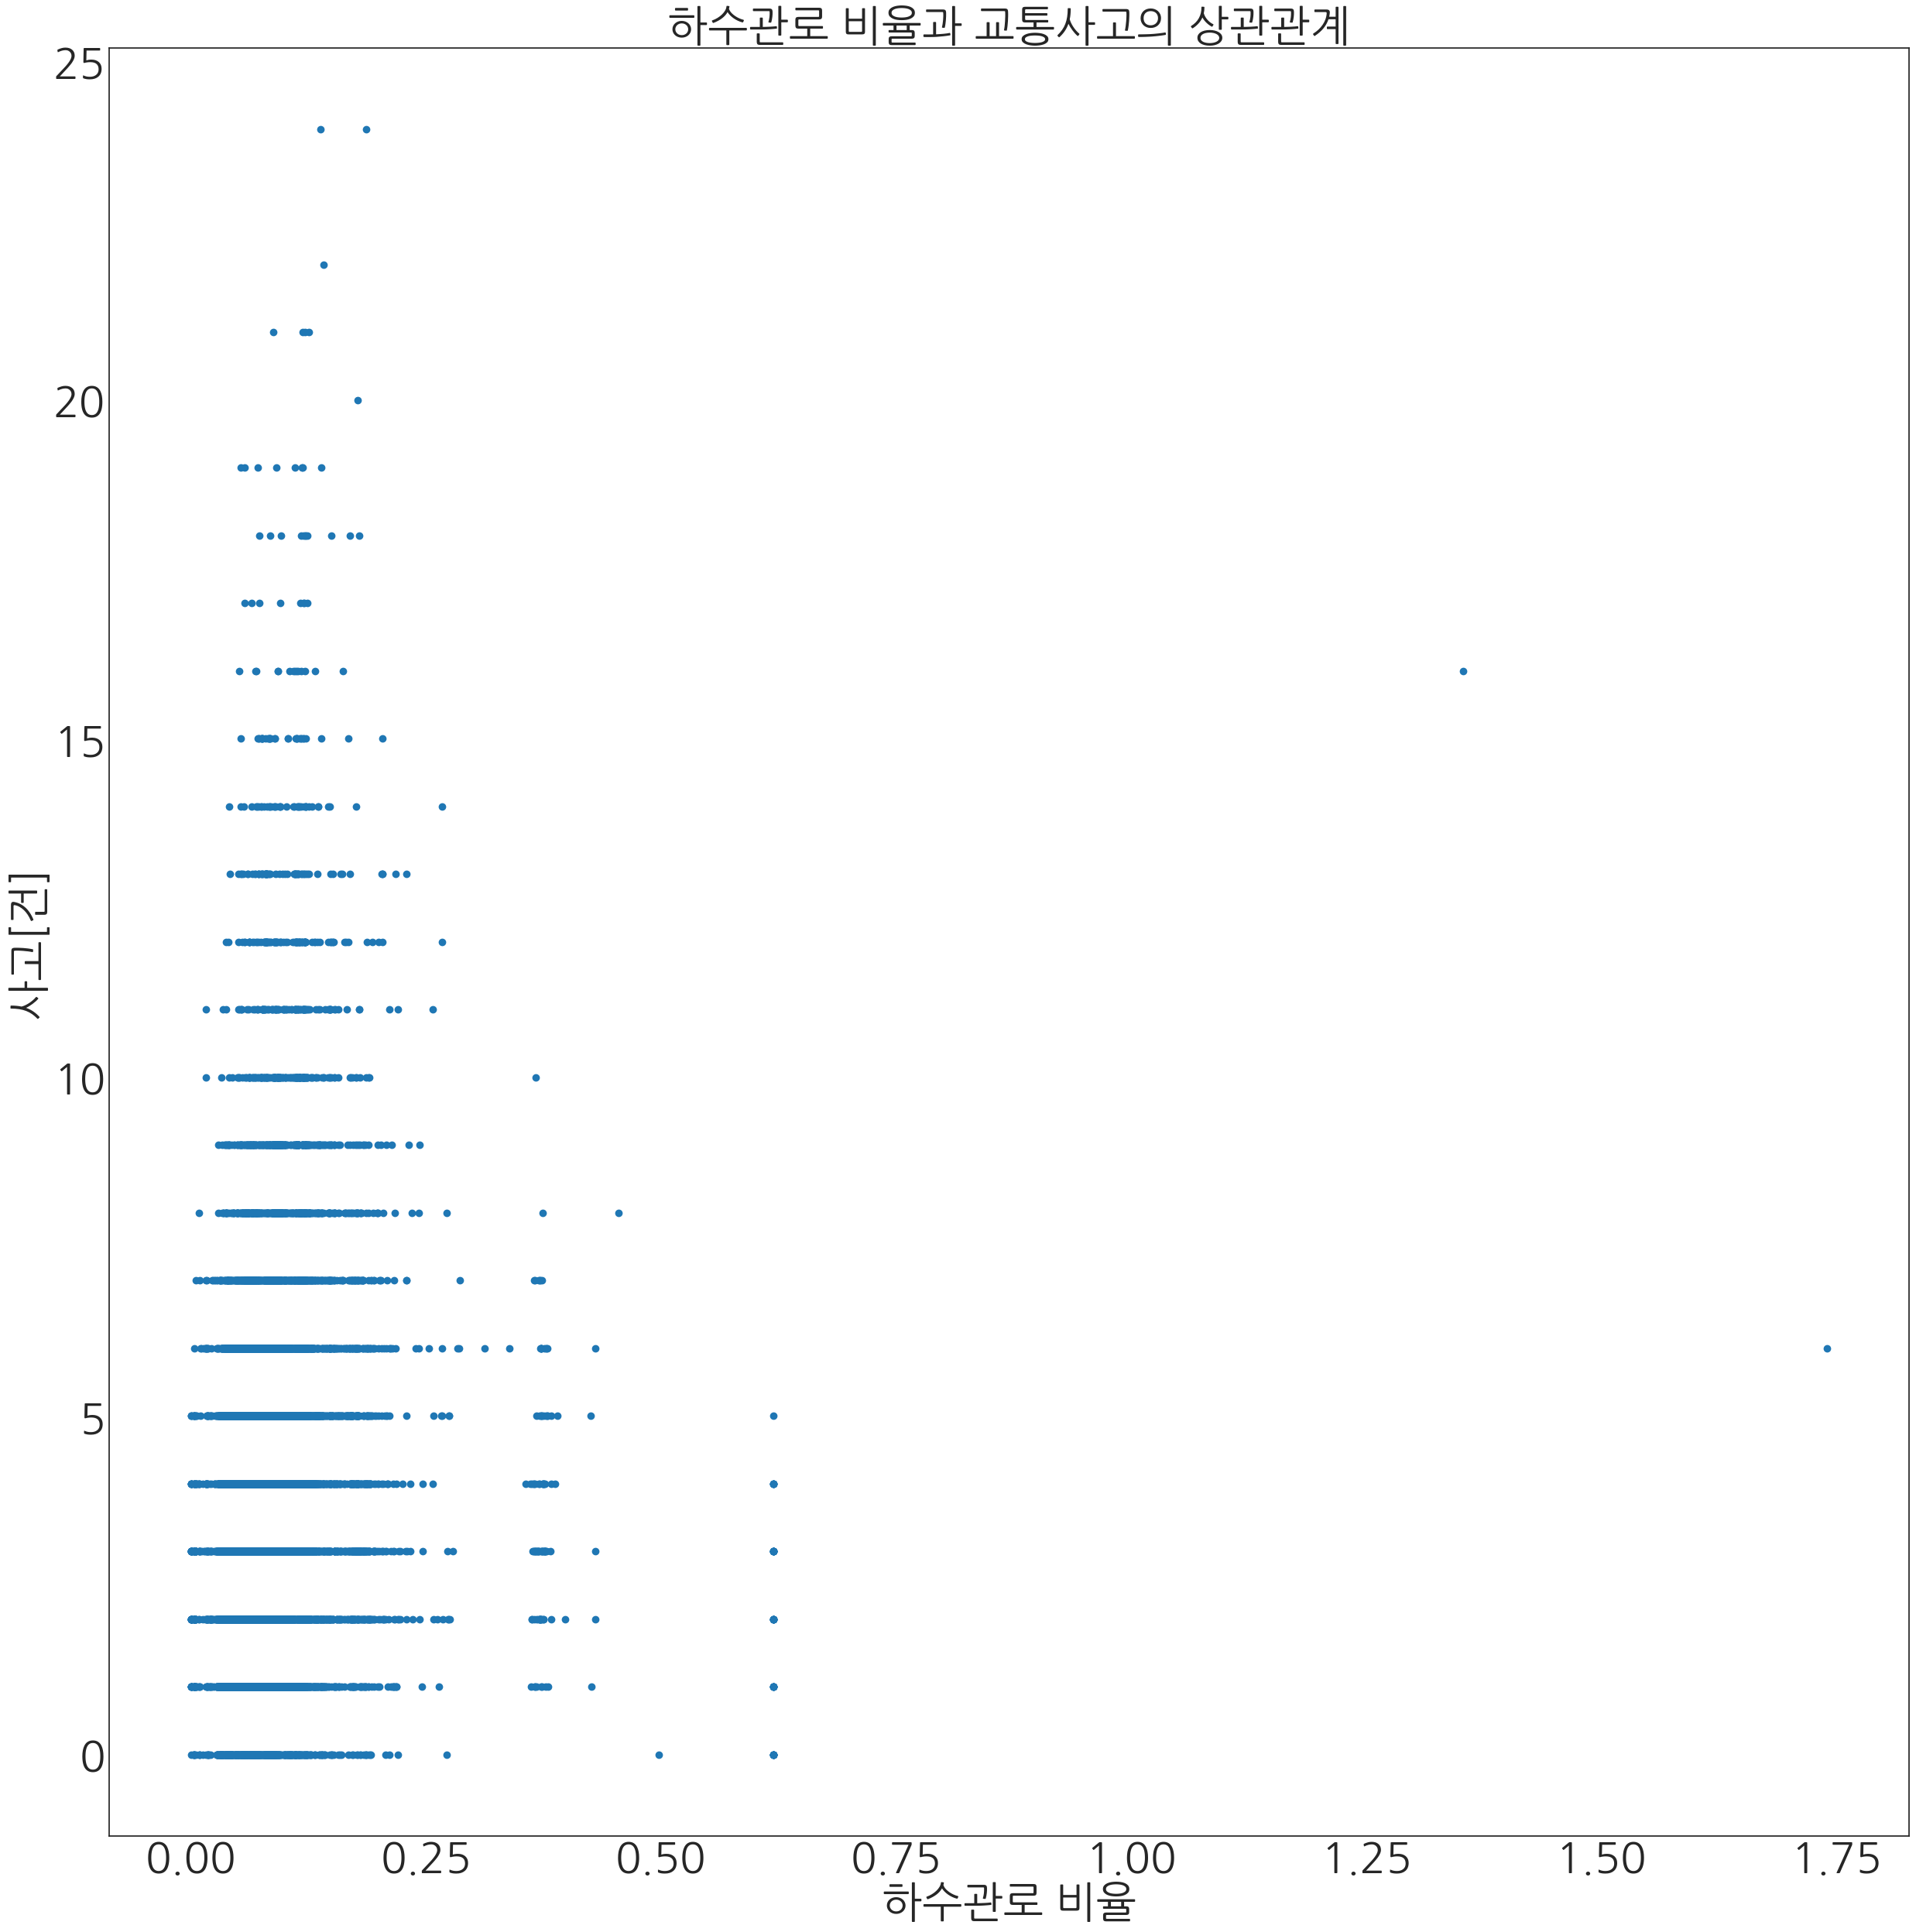

In [45]:
## 시각화
fig = plt.figure(figsize=(30,30))
fig.set_facecolor('white')
plt.rcParams['font.family'] = 'NanumGothic'
plt.title('하수관로 비율과 교통사고의 상관관계', fontsize=40)
    
font_size = 40
plt.scatter(df['하수관로 비율'],df['사고[건]'])
 
plt.xlabel('하수관로 비율', fontsize=font_size)
plt.ylabel('사고[건]',fontsize=font_size)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()